#### What is Support Vector Machine Algorithm?
Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification tasks, although it can also be adapted for regression. The main idea behind SVM is to find the optimal hyperplane that separates data points of different classes in a high-dimensional space.


- Key Features:

    - Maximal Margin: SVM aims to maximize the margin between the closest points of different classes (support vectors) and the hyperplane.
    - Kernel Trick: SVM can efficiently perform non-linear classification using kernel functions, allowing it to operate in a transformed feature space.
Robust to Overfitting: By focusing on the support vectors and ignoring the points far away from the margin, SVM can be less prone to overfitting.

#### Generate Random Data and Plot It
Let's generate a random dataset that SVM can solve and plot it.

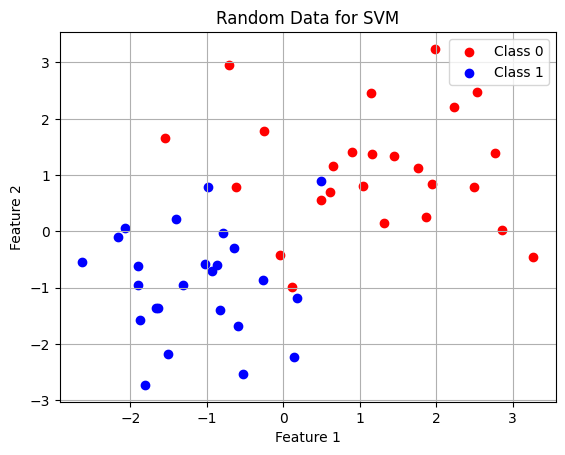

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = np.random.randn(50, 2)  # 50 samples, 2 features
y = np.array([0]*25 + [1]*25)  # Binary labels

# Create a linear separable dataset
X[:25] += 1  # Shift class 0 to the right
X[25:] -= 1  # Shift class 1 to the left

# Plot the data
plt.scatter(X[:25, 0], X[:25, 1], color='red', label='Class 0')
plt.scatter(X[25:, 0], X[25:, 1], color='blue', label='Class 1')
plt.title("Random Data for SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


#### Is Support Vector Machine Good for Regression or Classification or Both?
SVM is primarily known for classification tasks but can also be adapted for regression, known as Support Vector Regression (SVR).

- Classification: SVM finds the optimal hyperplane that maximizes the margin between different classes.
- Regression (SVR): SVM can predict continuous values by finding a function that approximates the relationship between input features and target values while maintaining a margin of tolerance around the predictions.

#### Implement Support Vector Machine from Scratch Using NumPy
Here's a simple implementation of a linear SVM using the Stochastic Gradient Descent (SGD) algorithm:

In [2]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, regularization_strength=0.01, num_iterations=1000):
        self.lr = learning_rate
        self.reg = regularization_strength
        self.num_iterations = num_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        y_binary = np.where(y == 1, 1, -1)  # Convert to {-1, 1}

        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y_binary[idx] * (np.dot(x_i, self.W)) >= 1
                if condition:
                    self.W -= self.lr * (2 * self.reg * self.W)
                else:
                    self.W -= self.lr * (2 * self.reg * self.W - np.dot(x_i, y_binary[idx]))

    def predict(self, X):
        linear_output = np.dot(X, self.W)
        return np.where(linear_output >= 0, 1, -1)

# Example usage
svm = LinearSVM()
svm.fit(X, y)
predictions = svm.predict(X)


#### When to Use Support Vector Machine and When Not to Use It

Use SVM When:

- You have a clear margin of separation between classes.
- The dataset is relatively small to medium in size.
- You need robust performance with high-dimensional data.

Avoid SVM When:

- The dataset is very large; SVMs can be slow and consume a lot of memory.
- The classes are not linearly separable without extensive preprocessing or kernel trick.
- You have a lot of noise in the data, which can affect the decision boundary.

#### What is the Loss Function?
The loss function for SVM is based on the hinge loss, which penalizes misclassified points and points that fall within the margin. The hinge loss for a single sample is defined as:

$$
​Loss(y_i, f(x_i)) = \max(0, 1 - y_i \cdot f(x_i))
$$

#### How to Optimize the Algorithm?

To optimize an SVM, you can:

- Use techniques such as Stochastic Gradient Descent (SGD) or Coordinate Descent to update weights.
- Implement kernel functions to transform data into a higher-dimensional space.
- Apply regularization to avoid overfitting.
- Use hyperparameter tuning (e.g., grid search) to find optimal values for parameters such as the learning rate, regularization strength, and kernel parameters.

#### How to Plot the Support Vector Machine for Visualization
You can visualize the decision boundary and support vectors using matplotlib. Here’s an example:


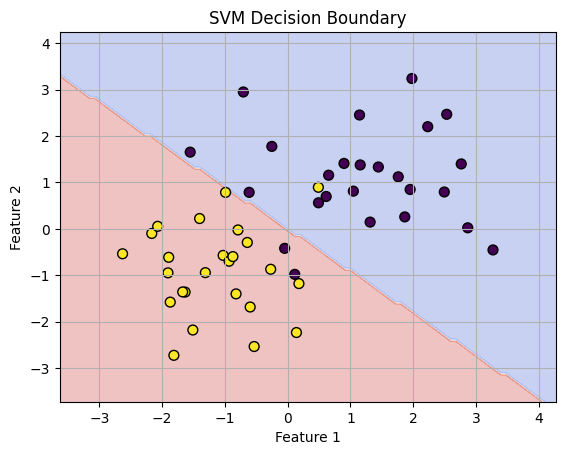

In [3]:
def plot_svm(svm, X, y):
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Visualize SVM
plot_svm(svm, X, y)


#### Kernels in SVM
Kernels in Support Vector Machines (SVMs) allow the algorithm to handle non-linear data by mapping it to a higher-dimensional space where a linear separation is possible. In simpler terms, kernels help SVMs solve problems where data is not linearly separable in its original feature space.

#### Linear Kernel
- Definition: Maps data without transforming it, creating a linear decision boundary.
- Formula:  $$ K(x,y)=x⋅y $$
- Use Case: When data is linearly separable or close to linear. It is fast and requires less computation.
- Example: Useful for text classification tasks, where high-dimensional but sparse data may be linearly separable.

#### Polynomial Kernel
- Definition: Creates a polynomial relationship between data points, allowing SVM to fit curved boundaries.
- Formula: $$ K(x,y)=(x⋅y+c)^d $$
where c is a constant and d is the polynomial degree.
- Use Case: When data has moderate non-linearity that can be captured with a polynomial relationship. Higher degrees capture more complex patterns.
- Example: Image recognition tasks where relationships between pixels aren’t strictly linear.

#### Radial Basis Function (RBF) / Gaussian Kernel
- Definition: This kernel considers the distance between data points to determine similarity, effectively creating circular decision boundaries.
- Formula: $$ K(x, y) = exp\left(-\frac{2\sigma^2 ||x-y||^2}{2}\right) $$
 
where 𝜎 controls the width of the Gaussian function.
- Use Case: When you have non-linear data with complex relationships. It’s often the default choice due to its flexibility in capturing intricate boundaries.
- Example: Often used in medical image analysis, where clusters may form around specific data points with non-linear relationships.
#### Sigmoid Kernel
- Definition: This kernel mimics a neural network activation function, offering non-linear decision boundaries.
- Formula: 
$$ K(x, y) = exp\left(-\frac{2\sigma^2 ||x-y||^2}{2}\right) $$
, where α and c are parameters.
- Use Case: Useful in situations where relationships between data are less clear, and linearity is not expected. It’s commonly used in neural networks but less popular for SVM.
- Example: Situations where SVM is used as a neural network surrogate, such as sentiment analysis.

#### When to Use SVMs and When to Avoid Them

#### Use SVMs When:
Small to Medium Dataset: SVMs work well on small to medium-sized datasets, especially those with a clean margin between classes.
High Dimensional Spaces: They handle high-dimensional data well and are often used for text classification or image data.
Binary Classification: SVMs are ideal for binary classification, though they can be extended to multiclass scenarios.
Avoid SVMs When:
Very Large Datasets: SVM training can be computationally intensive and slow on large datasets.
Noisy Data: SVMs are sensitive to noise, especially outliers that lie within the margin, which can affect the hyperplane.
Overlapping Classes: If classes overlap significantly, the SVM may struggle to find an appropriate margin, even with kernels.

#### What Else to Know About SVMs
- 1. Support Vectors
Support vectors are the data points closest to the hyperplane and are critical in defining the margin. They help SVMs maintain robustness by focusing only on the points near the boundary, reducing the impact of far-off points.
- 2. Hyperparameter Tuning
Regularization Parameter (C): Balances the margin size with misclassification tolerance. Higher 
𝐶 values prioritize correctly classifying all training points, potentially leading to overfitting.
Kernel Parameters: Different kernels have unique parameters (e.g., σ in RBF), which should be tuned using cross-validation for optimal performance.
- 3. Optimization Techniques
The SVM optimization problem is solved via techniques like Quadratic Programming (QP), but libraries like scikit-learn often use approximations for efficiency, such as the Sequential Minimal Optimization (SMO) algorithm.
- 4. Margin Interpretation
The margin in SVMs is a crucial element. Larger margins often generalize better, while smaller margins may lead to overfitting.
- 5. Visualizing SVMs
Visualizing SVM models (e.g., decision boundaries, support vectors) is useful for interpreting SVM results, particularly in lower-dimensional spaces.
